In [24]:
#导入Matplotlib的pyplot模块
import matplotlib. pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
#import required modules
from pathlib import Path

#display option in jupyter notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)

In [9]:
data = pd.read_csv('2021年医生信息.csv') # 数据导入

In [10]:
RJhos = data[data["医院"]=="上海交通大学医学院附属瑞金医院"] # 筛选瑞金医院数据

In [11]:
RJhos.shape

(807, 23)

In [12]:
RJhos["开通时间"] = pd.to_datetime(RJhos['开通时间']) # 将开通时间字符型转化为时间型

C:\Users\DELL\AppData\Local\Temp\ipykernel_9972\801280585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RJhos["开通时间"] = pd.to_datetime(RJhos['开通时间']) # 将开通时间字符型转化为时间型


In [13]:
RJhos["上次在线"] = pd.to_datetime(RJhos['上次在线']) # 将上次在线时间字符型转化为时间型

C:\Users\DELL\AppData\Local\Temp\ipykernel_9972\2368649953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RJhos["上次在线"] = pd.to_datetime(RJhos['上次在线']) # 将上次在线时间字符型转化为时间型


In [14]:
s_date = datetime.datetime.strptime('20210401', '%Y%m%d').date() # 定一个时间标的，2021.4.1

In [15]:
old_hos = RJhos[RJhos['开通时间'].dt.date < s_date] # 筛选2021,4,1之前开通的医生

In [17]:
new_hos = RJhos[RJhos['开通时间'].dt.date >= s_date] # 筛选2021,4,1之后开通的医生

In [18]:
O=old_hos.groupby('标准科室')['医生脱敏唯一标识'].count().reset_index()

In [19]:
N=new_hos.groupby('标准科室')['医生脱敏唯一标识'].count().reset_index()

In [20]:
A=pd.merge(O,N,on='标准科室')
A

,标准科室,医生脱敏唯一标识_x,医生脱敏唯一标识_y
0,乳腺外科,6,8
1,儿科,21,7
2,功能神经外科,13,3
3,医学影像科,6,6
4,呼吸科,14,2
5,妇产科,12,6
6,康复科,9,2
7,心血管内科,44,2
8,心血管外科,20,3
9,急诊科,5,1


In [21]:
A.sort_values(['医生脱敏唯一标识_y'],ascending=False,inplace=True)

In [44]:
x_data=A['标准科室'].values[:15]
y_data1=A['医生脱敏唯一标识_x'].values[:15]
y_data2=A['医生脱敏唯一标识_y'].values[:15]

C:\Users\DELL\AppData\Local\Temp\ipykernel_9972\3524439632.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_data, rotation=45, ha='center')


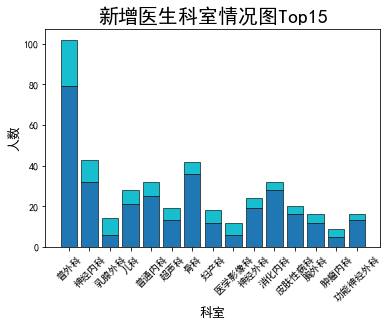

In [46]:
fig, ax = plt.subplots()#创建子图，参数均为默认
plt.title("新增医生科室情况图Top15", fontsize=20)
ax.bar(x_data, y_data1, width=.8, color='tab:blue',ec='k',lw=.6)
ax.bar(x_data, y_data2, width=.8,  bottom=y_data1, color='tab:cyan',ec='k',lw=.6)
#设置坐标轴的标签，字体大小设为13，用fontsize设置字体大小
ax.set_ylabel('人数',fontsize=13)
ax.set_xlabel('科室',fontsize=13)

ax.set_xticklabels(x_data, rotation=45, ha='center')

plt.show()